<a href="https://colab.research.google.com/github/AhmedHefnawy/object-detection-with-CNN/blob/master/Object_detection_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### define the problem
Fashion training set consists of 70,000 images > 

divided into 60,000 training and 

10,000 testing samples. 

Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes.

The 10 classes are as follows:
- 0 => T-shirt/top 
- 1 => Trouser 
- 2 => Pullover 
- 3 => Dress 
- 4 => Coat 
- 5 => Sandal 
- 6 => Shirt 
- 7 => Sneaker 
- 8 => Bag
- 9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker.

 pixel-value is an integer between 0 and 255.

### import libraries 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random

%matplotlib inline
sns.set_style("whitegrid")

In [ ]:
# dataframes creation for both training and testing datasets 
fashion_train_df = pd.read_csv('/content/fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('/content/fashion-mnist_test.csv', sep = ',')

### VISUALIZATION OF THE DATASET  

In [ ]:

fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Let's view the last elements in the training dataset
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Let's view the head of the testing dataset
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Let's view the last elements in the testing dataset
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [ ]:
fashion_train_df.shape

(60000, 785)

In [ ]:
# Create training and testing arrays
train = np.array(fashion_train_df, dtype = 'float32')
test = np.array(fashion_test_df, dtype='float32')

In [ ]:
train.shape

(60000, 785)

In [ ]:
train

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
test

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Text(0.5, 1.0, 'Shirt')

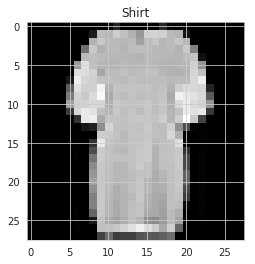

In [ ]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Let's view some images!
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow(train[i,1:].reshape((28,28))) # reshape and plot the image

plt.imshow(train[i,1:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image
label_index = fashion_train_df["label"][i]
plt.title(f"{class_names[label_index]}")


In [ ]:
label = train[i,0]
label

6.0

- View multiple images

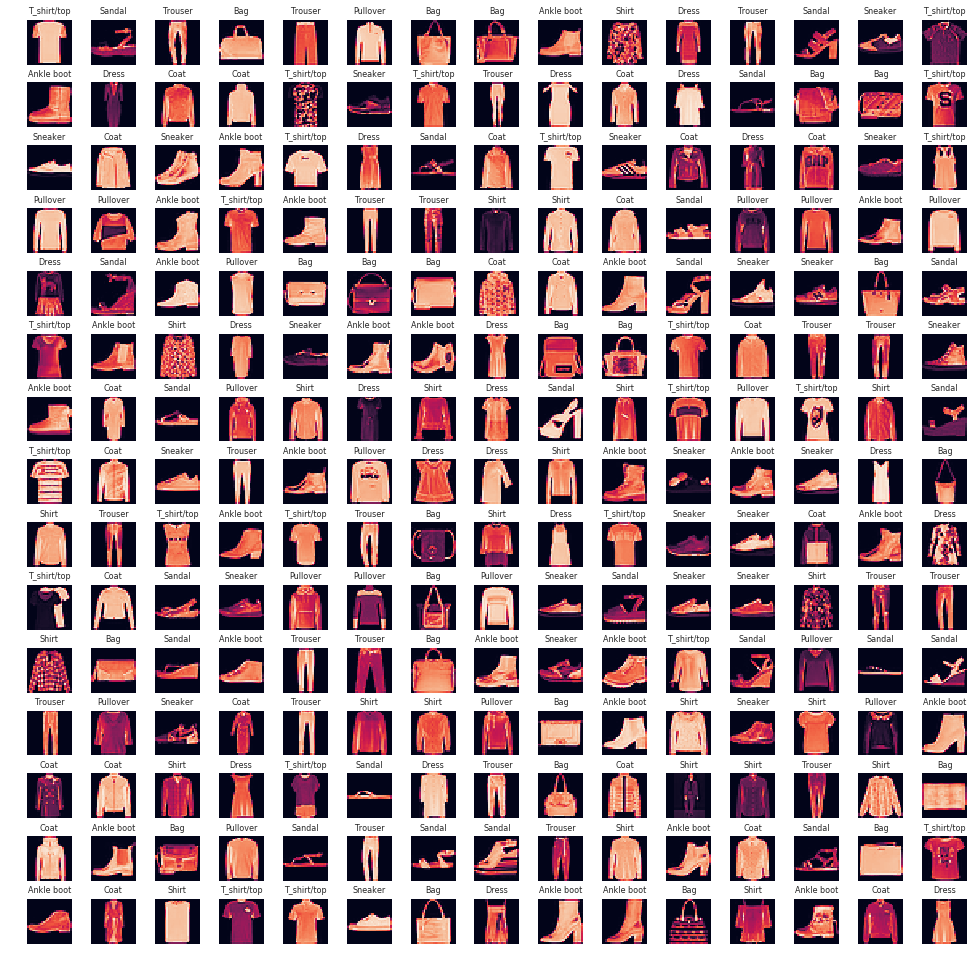

In [ ]:

W_grid = 15
L_grid = 15


fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train[index,1:].reshape((28,28)) )
    label_index = int(train[index,0])
    axes[i].set_title(class_names[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)


In [ ]:
# Prepare the training and testing dataset 
X_train = train[:, 1:] / 255
y_train = train[:, 0]

X_test = test[:, 1:] / 255
y_test = test[:,0]

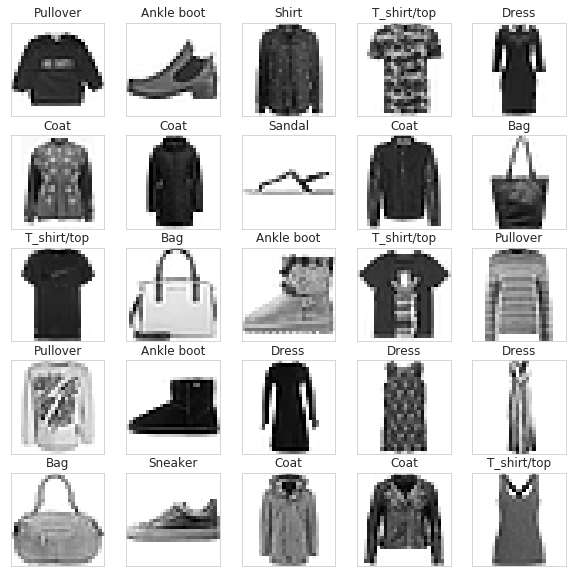

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

### TRAINING THE MODEL

We split our training data into train and validate datasets, in order to train our model and validate it using the validation data set to avoid overfitting before testing the model on the test datasets which is as real-world data for our model.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(48000, 784)
(48000,)


In [ ]:
# * unpack the tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)

(48000, 28, 28, 1)
(48000,)
(12000, 28, 28, 1)


### Build the model

In [ ]:
import keras
# import tensorflow

Using TensorFlow backend.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [ ]:
cnn_model = Sequential()

# Try 32 fliters first then 64
cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

# cnn_model.add(Conv2D(32,3, 3, activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(units = 10, activation = 'softmax'))

The first layer in this network, `keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer that returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

### Compile the model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

- *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
- *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [ ]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

### Train the model

In [ ]:
epochs = 150

history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = epochs,
                        verbose = 1, validation_data = (X_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/150
48000/48000 [==============================] - 5s 112us/step - loss: 1.1880 - accuracy: 0.5443 - val_loss: 0.7053 - val_accuracy: 0.7328
Epoch 2/150
48000/48000 [==============================] - 1s 25us/step - loss: 0.7105 - accuracy: 0.7321 - val_loss: 0.5891 - val_accuracy: 0.7771
Epoch 3/150
48000/48000 [==============================] - 1s 23us/step - loss: 0.6165 - accuracy: 0.7699 - val_loss: 0.5244 - val_accuracy: 0.8073
Epoch 4/150
48000/48000 [==============================] - 1s 24us/step - loss: 0.5658 - accuracy: 0.7904 - val_loss: 0.4842 - val_accuracy: 0.8208
Epoch 5/150
48000/48000 [==============================] - 1s 24us/step - loss: 0.5312 - accuracy: 0.8048 - val_loss: 0.4601 - val_accuracy: 0.8335
Epoch 6/150
48000/48000 [==============================] - 1s 24us/step - loss: 0.5005 - accuracy: 0.8150 - val_loss: 0.4293 - val_accuracy: 0.8413
Epoch 7/150
48000/48000 [==============================] - 1s

Epoch 56/150
48000/48000 [==============================] - 1s 24us/step - loss: 0.2481 - accuracy: 0.9061 - val_loss: 0.2591 - val_accuracy: 0.9049
Epoch 57/150
48000/48000 [==============================] - 1s 25us/step - loss: 0.2484 - accuracy: 0.9061 - val_loss: 0.2567 - val_accuracy: 0.9064
Epoch 58/150
48000/48000 [==============================] - 1s 25us/step - loss: 0.2417 - accuracy: 0.9095 - val_loss: 0.2592 - val_accuracy: 0.9037
Epoch 59/150
48000/48000 [==============================] - 1s 23us/step - loss: 0.2415 - accuracy: 0.9083 - val_loss: 0.2598 - val_accuracy: 0.9040
Epoch 60/150
48000/48000 [==============================] - 1s 23us/step - loss: 0.2410 - accuracy: 0.9096 - val_loss: 0.2630 - val_accuracy: 0.9050
Epoch 61/150
48000/48000 [==============================] - 1s 23us/step - loss: 0.2419 - accuracy: 0.9079 - val_loss: 0.2537 - val_accuracy: 0.9079
Epoch 62/150
48000/48000 [==============================] - 1s 23us/step - loss: 0.2421 - accuracy: 0.9087

Epoch 111/150
48000/48000 [==============================] - 1s 23us/step - loss: 0.2050 - accuracy: 0.9217 - val_loss: 0.2528 - val_accuracy: 0.9114
Epoch 112/150
48000/48000 [==============================] - 1s 25us/step - loss: 0.2073 - accuracy: 0.9217 - val_loss: 0.2509 - val_accuracy: 0.9112
Epoch 113/150
48000/48000 [==============================] - 1s 23us/step - loss: 0.2050 - accuracy: 0.9222 - val_loss: 0.2499 - val_accuracy: 0.9108
Epoch 114/150
48000/48000 [==============================] - 1s 23us/step - loss: 0.2027 - accuracy: 0.9235 - val_loss: 0.2523 - val_accuracy: 0.9112
Epoch 115/150
48000/48000 [==============================] - 1s 25us/step - loss: 0.2004 - accuracy: 0.9245 - val_loss: 0.2546 - val_accuracy: 0.9062
Epoch 116/150
48000/48000 [==============================] - 1s 24us/step - loss: 0.2031 - accuracy: 0.9230 - val_loss: 0.2507 - val_accuracy: 0.9103
Epoch 117/150
48000/48000 [==============================] - 1s 23us/step - loss: 0.2000 - accuracy:

Text(0.5, 1.0, 'Accuracy evolution')

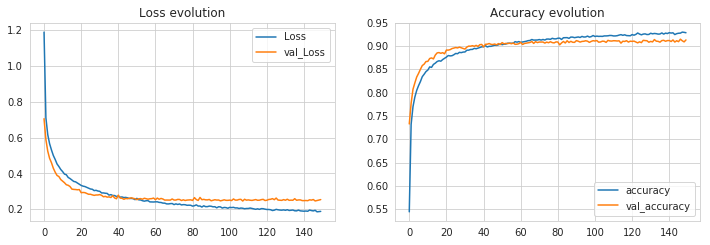

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

#### : EVALUATING THE MODEL

In [ ]:
evaluation = cnn_model.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1]:.3f}')

10000/10000 [==============================] - 1s 92us/step
Test Accuracy : 0.918


## Makes predictions


In [ ]:
# get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)

In [ ]:
test_img = X_test[0]
prediction = cnn_model.predict(X_test)
prediction[0]

array([9.9869126e-01, 8.0477438e-13, 3.5451542e-04, 4.1329764e-07,
       1.5509299e-06, 1.0341513e-12, 9.5229724e-04, 5.0063404e-15,
       3.3527506e-10, 1.1775688e-13], dtype=float32)

In [ ]:
np.argmax(prediction[0])

0

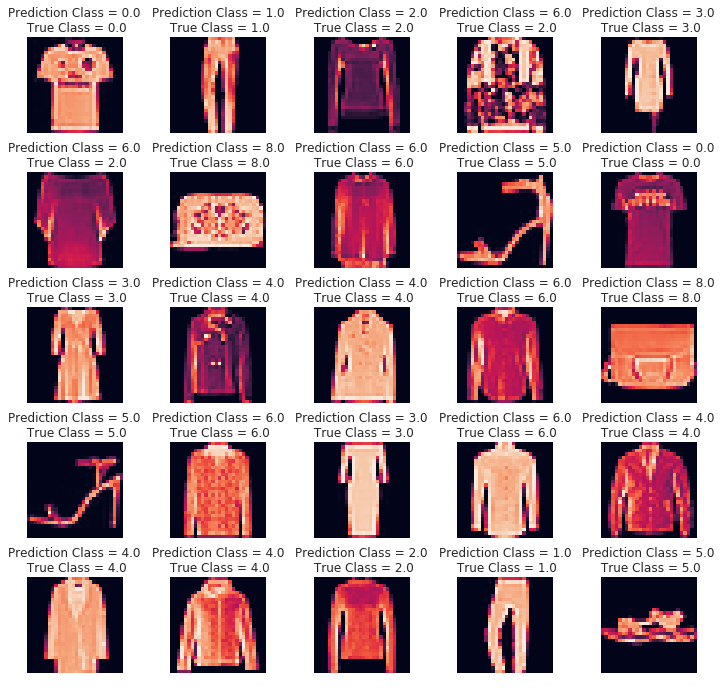

In [ ]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

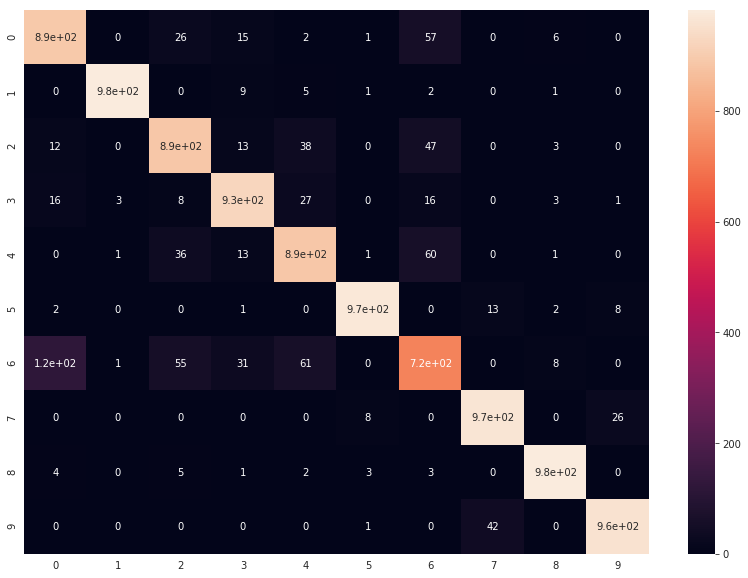

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

In [ ]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = [f"Class {i}" for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.85      0.89      0.87      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.87      0.89      0.88      1000
     Class 3       0.92      0.93      0.92      1000
     Class 4       0.87      0.89      0.88      1000
     Class 5       0.98      0.97      0.98      1000
     Class 6       0.80      0.72      0.76      1000
     Class 7       0.95      0.97      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.96      0.96      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

